# What makes people happy? 

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

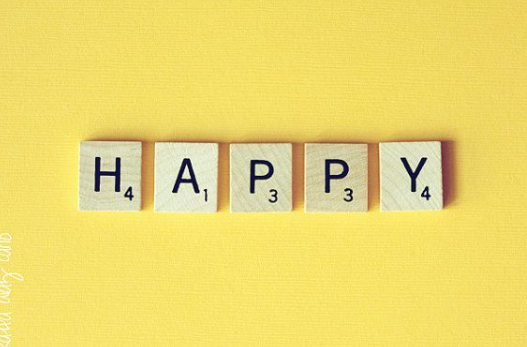


**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity 
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption 
- `year`  


>dataset: `Project1._Happiness-Score.csv`

# Problem statement

Which factors are more important to live a happier life? 
As a result, people and countries can focus on the more significant factors to achieve a higher happiness level


In [1]:
# Exercise 1.Tell a story with your dataset, to try to answer the following question:

'Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level'

# To achieve this goal use the different funcionalities from 
# the visualization libraries that you have seen in the module

'Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level'

1. How correlated is the over all rank related to the gdp per capita
2. Which continents are the happiest?
3. Is there any connection bewteen the perception of corruption and freedom of life choises
4. Do people with the higher generosity score have a higher healthy_life_expectancy


### Setup & Data set

##  Exploratory Data Analysis and Data cleaning

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
# word cloud library
from wordcloud import WordCloud
import plotly.express as px
import pycountry_convert as pc

import warnings
warnings.filterwarnings('ignore')
import pandas_profiling

In [3]:
import sys
sys.path.insert(0, 'C:/Users/Florina/Desktop/allwomen/DS_2021/functions')
   
from Functions_EDA import *

In [4]:
df = pd.read_csv('../datasets/P1-dataset.csv', index_col=0, skipinitialspace = True)

### Know the data

In [5]:
df.head()

,Unnamed: 0.1,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


In [6]:
df.tail()

,Unnamed: 0.1,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
307,151,152,Rwanda,3.334,0.359,0.711,NaN,0.555,0.217,0.411,2019
308,152,153,Tanzania,3.231,0.476,0.885,NaN,0.417,0.276,0.147,2019
309,153,154,Afghanistan,3.203,0.350,0.517,NaN,0.000,0.158,0.025,2019
310,154,155,Central African Republic,3.083,0.026,0.000,NaN,0.225,0.235,0.035,2019
311,155,156,South Sudan,2.853,0.306,0.575,NaN,0.010,0.202,0.091,2019


In [7]:
df.shape

(312, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  312 non-null    int64  
 1   Overall rank                  312 non-null    int64  
 2   Country or region             312 non-null    object 
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Healthy life expectancy       7 non-null      float64
 7   Freedom to make life choices  312 non-null    float64
 8   Generosity                    312 non-null    float64
 9   Perceptions of corruption     311 non-null    float64
 10  year                          312 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 29.2+ KB


In [9]:
df.dtypes.value_counts()

float64    7
int64      3
object     1
dtype: int64

### Clean the data

In [10]:
df.drop('Unnamed: 0.1', axis = 1, inplace=True)

In [11]:
#renamining columns in order to remove space
cols = {'Overall rank': 'overall_rank',
                   'Country or region':'country',
                   'Score': 'score',
                   'GDP per capita':'gdp_capita',
                   'Social support': 'social_support',
                   'Healthy life expectancy': 'healthy_life_expectancy',
                   'Freedom to make life choices': 'freedom_life_choices',
                   'Generosity': 'generosity',
                   'Perceptions of corruption': 'perceptions_of_corruption'}

In [12]:
df.rename(columns=cols, inplace=True)

In [13]:
df.head()

,overall_rank,country,score,gdp_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption,year
0,1,Finland,7.632,1.305,1.592,NaN,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,NaN,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,NaN,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,NaN,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,NaN,0.660,0.256,0.357,2018


#### Mising values

In [14]:
#cheching percentage of missing values
missing_data = percentage_nullValues(df)
missing_data

,Percentage_NaN
healthy_life_expectancy,97.8
perceptions_of_corruption,0.3
overall_rank,0.0
country,0.0
score,0.0
gdp_capita,0.0
social_support,0.0
freedom_life_choices,0.0
generosity,0.0
year,0.0


##### Dealing with missing value for the perceptions_of_corruption column

In [15]:
#the country with nan value on perceptions_of_corruption
df[df.perceptions_of_corruption.isna()]

,overall_rank,country,score,gdp_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption,year
19,20,United Arab Emirates,6.774,2.096,0.776,NaN,0.284,0.186,NaN,2018


In [16]:
#checking values for perceptions_of_corruption in 2018 & 2019
df[df.country == 'United Arab Emirates']


,overall_rank,country,score,gdp_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption,year
19,20,United Arab Emirates,6.774,2.096,0.776,NaN,0.284,0.186,NaN,2018
176,21,United Arab Emirates,6.825,1.503,1.310,NaN,0.598,0.262,0.182,2019


In [17]:
#replacing the 2018 nan value with the 2019 value 
repl_nan = df[df.country == 'United Arab Emirates']['perceptions_of_corruption'].values[1]
df.fillna(value=repl_nan, inplace=True)

In [18]:
#let's double check, to make sure we have the desired result
df[df.country == 'United Arab Emirates']

,overall_rank,country,score,gdp_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption,year
19,20,United Arab Emirates,6.774,2.096,0.776,0.182,0.284,0.186,0.182,2018
176,21,United Arab Emirates,6.825,1.503,1.310,0.182,0.598,0.262,0.182,2019


In [19]:
#just triple checking
df.perceptions_of_corruption.isna().sum()

0

##### Dealing with missing value for the healthy_life_expectancy column

In [20]:
#1. dropping 'Unnamed: 0.1' & 'healthy_life_expectancy'
df.drop(['healthy_life_expectancy'], axis = 1, inplace=True)
df

,overall_rank,country,score,gdp_capita,social_support,freedom_life_choices,generosity,perceptions_of_corruption,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...
307,152,Rwanda,3.334,0.359,0.711,0.555,0.217,0.411,2019
308,153,Tanzania,3.231,0.476,0.885,0.417,0.276,0.147,2019
309,154,Afghanistan,3.203,0.350,0.517,0.000,0.158,0.025,2019
310,155,Central African Republic,3.083,0.026,0.000,0.225,0.235,0.035,2019


In [21]:
#2. reading 2 data sets from a different source, that don't have missing data on healthy_life_expectancy column
df_2018 = pd.read_csv('../datasets/2018.csv', skipinitialspace = True)
df_2019 = pd.read_csv('../datasets/2019.csv', skipinitialspace = True)
df_init = df.copy()

In [22]:
df_2018.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [23]:
df_2019.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [24]:
# the new data sets are split by year, so we will be adding them up. in a sigle file with complete data on column "healthy_life_expectancy"
df_2018['year'] = '2018'
df_2018.rename(columns=cols, inplace=True)
df_2019['year'] = '2019'
df_2019.rename(columns=cols, inplace=True)
df_2018_2019 = pd.concat([df_2018,df_2019]).reset_index(drop=True)
#df_new1 = df_new.drop(['healthy_life_expectancy'], axis = 1, inplace=True)

In [25]:
df_2018_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   overall_rank               312 non-null    int64  
 1   country                    312 non-null    object 
 2   score                      312 non-null    float64
 3   gdp_capita                 312 non-null    float64
 4   social_support             312 non-null    float64
 5   healthy_life_expectancy    312 non-null    float64
 6   freedom_life_choices       312 non-null    float64
 7   generosity                 312 non-null    float64
 8   perceptions_of_corruption  311 non-null    float64
 9   year                       312 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 24.5+ KB


In [26]:
#let's replace the 2018 nan value with the 2019 value 
repl_nan = df_2018_2019[df_2018_2019.country == 'United Arab Emirates']['perceptions_of_corruption'].values[1]
df_2018_2019.fillna(value=repl_nan, inplace=True)

In [27]:
# let's change the year type for the external data set
df_2018_2019['year'] = df_2018_2019['year'].astype('int64')

In [28]:
df_2018_2019.head(2)

,overall_rank,country,score,gdp_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018


In [29]:
df.head(2)

,overall_rank,country,score,gdp_capita,social_support,freedom_life_choices,generosity,perceptions_of_corruption,year
0,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018


In [30]:
# Let's check if the external data set is identitical with the initial data set
df2 = df_2018_2019.copy()
df2.drop('healthy_life_expectancy', axis=1, inplace=True) #this is the column missing in the initila data set

In [31]:
#check if the 2 data sets are equal
df.equals(df2)

True

In [32]:
#the sets are identical (excepting the healthy_life_expectancy column), 
# which means we can continue our analysiswith our new dataset
df_2018_2019.shape

(312, 10)

In [33]:
df_2018_2019.dtypes.value_counts()

float64    7
int64      2
object     1
dtype: int64

In [34]:
df_2018_2019.isnull().sum().sum()

0

#### Duplicates

In [35]:
df_2018_2019.duplicated().sum()

0

#### Computing new feature

In [36]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except:
        country_continent_name = 'None'    
    return country_continent_name

In [37]:
df_2018_2019['continent'] = df_2018_2019['country'].apply(lambda x:country_to_continent(x))

In [38]:
df_2018_2019

,overall_rank,country,score,gdp_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption,year,continent
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018,Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018,Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018,Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018,Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018,Europe
...,...,...,...,...,...,...,...,...,...,...,...
307,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019,Africa
308,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019,Africa
309,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019,Asia
310,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019,Africa


In [39]:
df_2018_2019.continent.value_counts()

Asia             90
Africa           85
Europe           78
North America    25
South America    20
None             10
Oceania           4
Name: continent, dtype: int64

In [40]:
df_2018_2019[df_2018_2019['continent'] == 'None']['country']

37           Trinidad & Tobago
65                      Kosovo
103    Palestinian Territories
113        Congo (Brazzaville)
131           Congo (Kinshasa)
194          Trinidad & Tobago
201                     Kosovo
258        Congo (Brazzaville)
265    Palestinian Territories
282           Congo (Kinshasa)
Name: country, dtype: object

In [41]:
#we have 10 entries  that have no continent; let's check them 
countries = list(df_2018_2019[df_2018_2019['continent'] == 'None']['country'].value_counts().index)
countries

['Kosovo',
 'Congo (Brazzaville)',
 'Trinidad & Tobago',
 'Congo (Kinshasa)',
 'Palestinian Territories']

In [42]:
missing_continents = ['North America', 'Europe', 'Asia', 'Africa', 'Africa']
for i in range(len(countries)):
    df_2018_2019['continent'].where(~(df_2018_2019['country']== countries[i]), missing_continents[i], inplace = True)
df_2018_2019.continent.value_counts()  

Asia             92
Africa           89
Europe           80
North America    27
South America    20
Oceania           4
Name: continent, dtype: int64

### Explore the data

#### Data Structure

In [43]:
def cols_unique_vals(df, col_type):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'CATEG VAR: {col} --> unique values: {df[col].nunique()}')
            print()

        else:
            print(f'NUM VAR: {col} -->  unique values: {df[col].nunique()}')
            print('----------------')
            print()

cols_unique_vals(df_2018_2019, 'object')

NUM VAR: overall_rank -->  unique values: 156
----------------

CATEG VAR: country --> unique values: 160

NUM VAR: score -->  unique values: 295
----------------

NUM VAR: gdp_capita -->  unique values: 276
----------------

NUM VAR: social_support -->  unique values: 266
----------------

NUM VAR: healthy_life_expectancy -->  unique values: 242
----------------

NUM VAR: freedom_life_choices -->  unique values: 236
----------------

NUM VAR: generosity -->  unique values: 198
----------------

NUM VAR: perceptions_of_corruption -->  unique values: 174
----------------

NUM VAR: year -->  unique values: 2
----------------

CATEG VAR: continent --> unique values: 6



In [44]:
#get the countries that appear just one time in the data set
countries_rankings = df_2018_2019.groupby('country')['year'].nunique().reset_index()
short = countries_rankings[countries_rankings['year'] ==1]
#get the indexes of those countries 
indexes = short.set_index('country').index.tolist()
#list the countries excluded from the ranking in 2019
countries_excluded = df_2018_2019.set_index('country').loc[indexes] #set column 'country' as the index of the data set as 
countries_excluded.sort_values(['year', 'overall_rank']) #filter by index

,overall_rank,score,gdp_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption,year,continent
country,,,,,,,,,,
Belize,49,5.956,0.807,1.101,0.474,0.593,0.183,0.089,2018,North America
Macedonia,89,5.185,0.959,1.239,0.691,0.394,0.173,0.052,2018,Europe
Sudan,137,4.139,0.605,1.240,0.312,0.016,0.134,0.082,2018,Africa
Angola,142,3.795,0.730,1.125,0.269,0.000,0.079,0.061,2018,Africa
North Macedonia,84,5.274,0.983,1.294,0.838,0.345,0.185,0.034,2019,Europe
Gambia,120,4.516,0.308,0.939,0.428,0.382,0.269,0.167,2019,Africa
Swaziland,135,4.212,0.811,1.149,0.000,0.313,0.074,0.135,2019,Africa
Comoros,142,3.973,0.274,0.757,0.505,0.142,0.275,0.078,2019,Africa


In [45]:
df_2018_2019['country'] = df_2018_2019['country'].replace("North Macedonia", 'Macedonia')

In [46]:
df_2018_2019[df_2018_2019['country']==  "Macedonia"]

,overall_rank,country,score,gdp_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption,year,continent
88,89,Macedonia,5.185,0.959,1.239,0.691,0.394,0.173,0.052,2018,Europe
239,84,Macedonia,5.274,0.983,1.294,0.838,0.345,0.185,0.034,2019,Europe


In [47]:
df_2018_2019.to_csv('../datasets/happyness_score.csv')

#### Data split:

- `Numerical_variables`
- `Categorical_variables`

In [48]:
df_num = df_2018_2019.select_dtypes(include=['int64', 'float64'])
df_cat = df_2018_2019.select_dtypes(include='object')

In [49]:
df_num

,overall_rank,score,gdp_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption,year
0,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...
307,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
308,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
309,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
310,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [50]:
df_num_2018 = df_num[df_num['year'] == 2018]
df_num_2019 = df_num[df_num['year'] == 2019]

#### Descriptive Statistics

In [51]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
overall_rank,312.0,78.500000,45.104737,1.000,39.75000,78.5000,117.25000,156.000
score,312.0,5.391506,1.114631,2.853,4.51425,5.3795,6.17600,7.769
gdp_capita,312.0,0.898298,0.394592,0.000,0.60950,0.9600,1.21950,2.096
social_support,312.0,1.211026,0.300310,0.000,1.05575,1.2655,1.45750,1.644
healthy_life_expectancy,312.0,0.661295,0.252724,0.000,0.48825,0.6990,0.85800,1.141
freedom_life_choices,312.0,0.423538,0.156024,0.000,0.32250,0.4495,0.54025,0.724
generosity,312.0,0.182926,0.096739,0.000,0.10875,0.1755,0.24500,0.598
perceptions_of_corruption,312.0,0.111526,0.095296,0.000,0.05000,0.0820,0.14125,0.457
year,312.0,2018.500000,0.500803,2018.000,2018.00000,2018.5000,2019.00000,2019.000


In [52]:
df_num_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
overall_rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
score,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
gdp_capita,156.0,0.891449,0.391921,0.000,0.61625,0.9495,1.19775,2.096
social_support,156.0,1.213237,0.302372,0.000,1.06675,1.2550,1.46300,1.644
healthy_life_expectancy,156.0,0.597346,0.247579,0.000,0.42225,0.6440,0.77725,1.030
freedom_life_choices,156.0,0.454506,0.162424,0.000,0.35600,0.4870,0.57850,0.724
generosity,156.0,0.181006,0.098471,0.000,0.10950,0.1740,0.23900,0.598
perceptions_of_corruption,156.0,0.112449,0.096343,0.000,0.05100,0.0820,0.13900,0.457
year,156.0,2018.000000,0.000000,2018.000,2018.00000,2018.0000,2018.00000,2018.000


In [53]:
df_num_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
overall_rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
gdp_capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
social_support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
healthy_life_expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
freedom_life_choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
perceptions_of_corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453
year,156.0,2019.000000,0.000000,2019.000,2019.00000,2019.0000,2019.00000,2019.000


In [54]:
df_2018_2019.skew()

overall_rank                 0.000000
score                        0.013021
gdp_capita                  -0.298942
social_support              -1.102203
healthy_life_expectancy     -0.528072
freedom_life_choices        -0.631564
generosity                   0.803631
perceptions_of_corruption    1.650304
year                         0.000000
dtype: float64

- **Positively skewed**:Most frequent values are low and tail is towards high values.

- **Negatively skewed**: Most frequent values are high and tail is towards low values.


-  sk < -1 or sk > 1 : Distribution highly skewed
-  sk > -1 and sk < - 0.5 or sk >  0.5 and sk < 1 : Distribution moderately skewed
-  sk > - 0.5 and sk < 0.5: Distribution approximately symentric



> If **Mode< Median< Mean** then the distribution is positively skewed.

> If **Mode> Median> Mean** then the distribution is negatively skewed.

#### Data Distribution

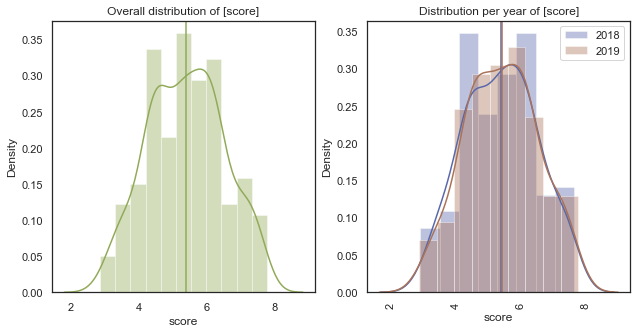

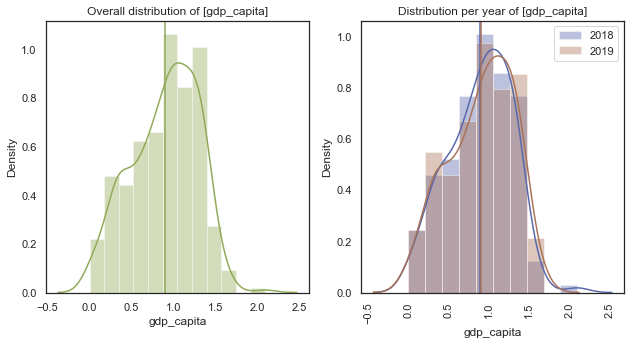

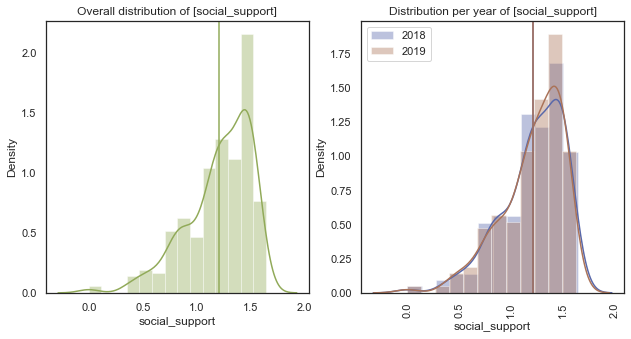

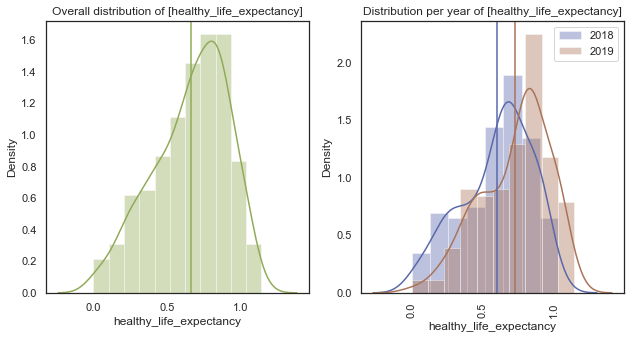

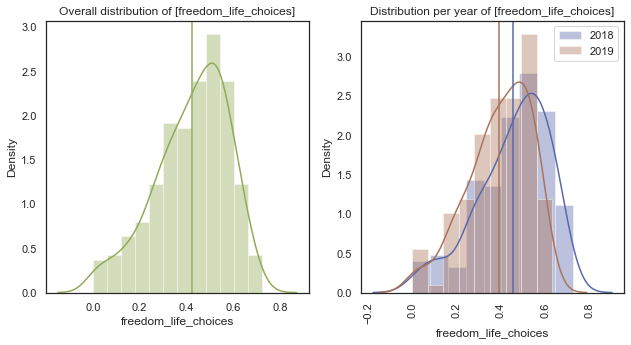

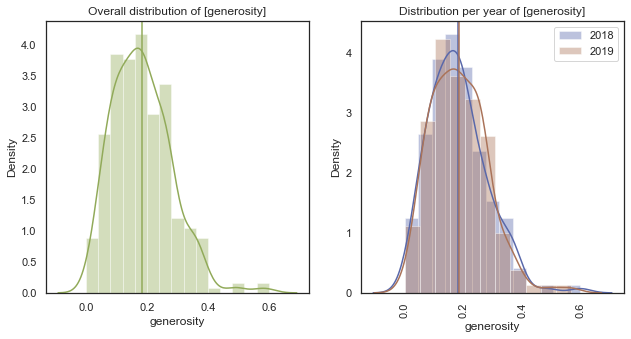

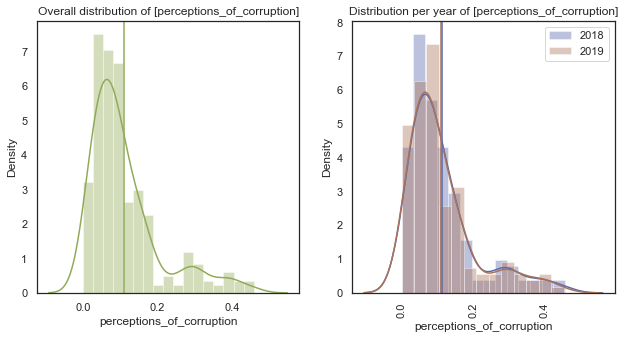

In [55]:
colors_year = ['#91aa59', '#5968aa', '#aa7359']

for col in df_num.loc[:, 'score':'perceptions_of_corruption']:
    
    f= plt.figure(figsize=(16,5))

    ax=f.add_subplot(131)
    sns.distplot(df_num[col],color=colors_year[0],ax=ax, label= "overall")
    plt.axvline(df_num[col].mean(), color=colors_year[0])
    
    ax.set_title(f'Overall distribution of [{col}]')

    ax=f.add_subplot(132)
    sns.distplot(df_num[df_num['year']==2018][col], 
                 color= colors_year[1], ax=ax, label=2018)

    sns.distplot(df_num[df_num['year']==2019][col], 
                 color=colors_year[2], ax=ax, label=2019)

    plt.axvline(df_num[df_num['year']==2018][col].mean(), 
                color=colors_year[1])

    plt.axvline(df_num[df_num['year']==2019][col].mean(), 
                color=colors_year[2])
    ax.set_title(f'Distribution per year of [{col}]')
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show()

#### Outliers

In [56]:
'''Second step, defining a function to make boxplots of the different columns. 
   We'll keep on the notebook just those which present outliers'''

def OutLiersBox2(df,nameOfFeature):
    """
    Function to create a BoxPlot and visualise:
    - All Points in the Variable
    - Suspected Outliers in the variable

    """
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all', #define that we want to plot all points
        marker = dict(
            color = 'rgb(29, 80, 81)'),
        line = dict(
            color = 'rgb(29, 80, 81)')
    )

    
    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers', # define the suspected Outliers
        marker = dict(
            color = 'rgb(93, 149, 150)',
            outliercolor = 'rgb(251, 159, 144)',
            line = dict(
                outliercolor = 'rgb(251, 159, 144)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(93, 149, 150)')
    )


    data = [trace0,trace1]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )
    
    fig = go.Figure(data=data,layout=layout)
    
    fig.update_layout(plot_bgcolor = "#edf5ef") #to customize background color
    fig.show()  

In [57]:
for col in df_num.loc[:, 'score':'perceptions_of_corruption']:
    OutLiersBox2(df_num, col)

#### Correlation Matrix

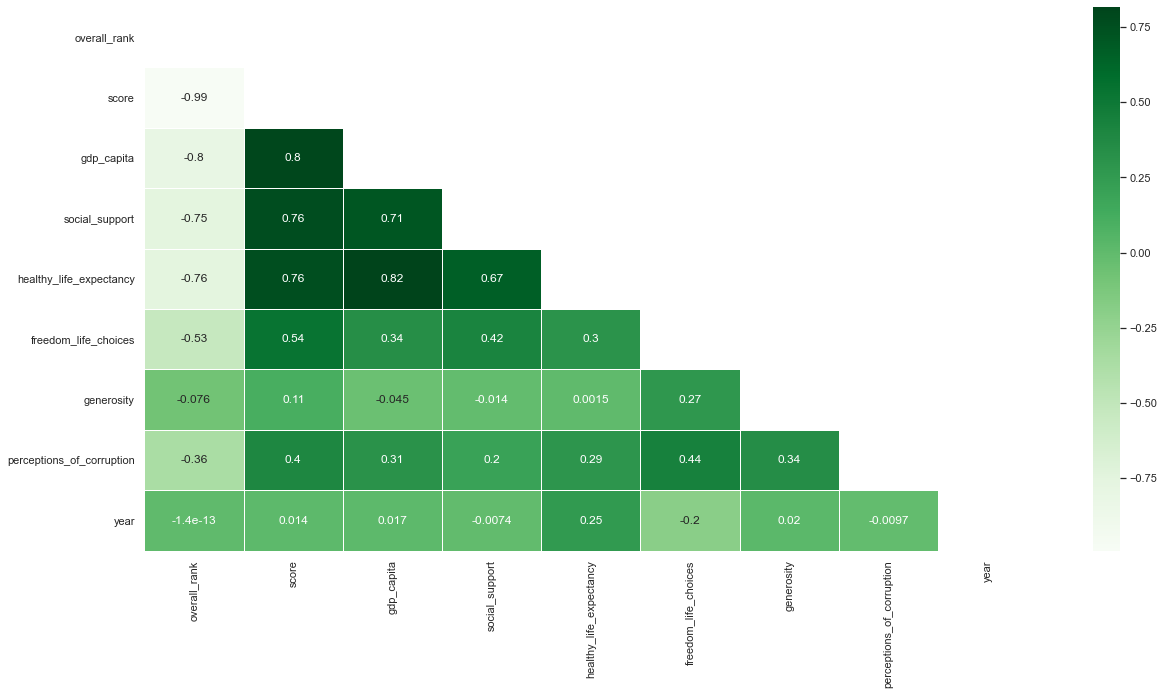

In [58]:
# Correlation Map
corr = df_2018_2019.corr()
f, ax = plt.subplots(figsize=(20, 10))
#sns.heatmap(data=corr, square=True , annot=True, cbar=True);

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask
ax = sns.heatmap(corr, mask=mask, annot=True, linewidths=.75, cmap ="Greens")
plt.show()


#sns.heatmap(corr, vmax=.8, square=True);

### Visual exploration

#### Happpiest and least happy countries

In [106]:
df_head=df_2018_2019.sort_values(['score'],ascending=False).head(20)
df_tail=df_2018_2019.sort_values(['score'],ascending=True).head(21)

# Step 1: Create the traces of the plots

df_head["year"] = df["year"].astype(str)
fig1 = px.bar(df_head, x = 'country', 
                 y = 'score', title="THE HAPPIEST COUNTRIES IN 2018 AND 2019", color='year',
                 color_discrete_sequence = ['#d86f3f','#f7c8be'],width=600, height=500)



fig1.update_yaxes(visible=False, fixedrange=True)
fig1.update_layout(barmode='group')
fig1.show()


df_tail["year"] = df["year"].astype(str)
fig2 = px.bar(df_tail, x = 'country', 
                 y = 'score', title="THE UNHAPPIEST COUNTRIES IN 2018 AND 2019", color='year',
                 color_discrete_sequence = ['#1d5051','#aab8bb'],width=600, height=500)

fig2.update_yaxes(visible=False, fixedrange=True)
fig2.update_layout(barmode='group')
fig2.show()



NameError: name 'make_subplots' is not defined

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"}, {"type": "polar"}]
           )

fig.add_trace(go.Bar(y=[2, 3, 1]),
              row=1, col=1)

fig.add_trace(go.Barpolar(theta=[0, 45, 90], r=[2, 3, 1]),
              row=1, col=2)


fig.update_layout(height=700, showlegend=False)

fig.show()

In [60]:
#
def country_to_ISO(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        #country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        #country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except:
        country_alpha2 = 'None'    
    return country_alpha2

In [61]:
df_2018_2019['ISO'] = df_2018_2019['country'].apply(lambda x:country_to_ISO(x))

In [62]:
df_2018_2019[df_2018_2019['ISO'] == "None"]

,overall_rank,country,score,gdp_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption,year,continent,ISO
37,38,Trinidad & Tobago,6.192,1.223,1.492,0.564,0.575,0.171,0.019,2018,Asia,None
65,66,Kosovo,5.662,0.855,1.230,0.578,0.448,0.274,0.023,2018,North America,None
103,104,Palestinian Territories,4.743,0.642,1.217,0.602,0.266,0.086,0.076,2018,Africa,None
113,114,Congo (Brazzaville),4.559,0.682,0.811,0.343,0.514,0.091,0.077,2018,Europe,None
131,132,Congo (Kinshasa),4.245,0.069,1.136,0.204,0.312,0.197,0.052,2018,Africa,None
194,39,Trinidad & Tobago,6.192,1.231,1.477,0.713,0.489,0.185,0.016,2019,Asia,None
201,46,Kosovo,6.100,0.882,1.232,0.758,0.489,0.262,0.006,2019,North America,None
258,103,Congo (Brazzaville),4.812,0.673,0.799,0.508,0.372,0.105,0.093,2019,Europe,None
265,110,Palestinian Territories,4.696,0.657,1.247,0.672,0.225,0.103,0.066,2019,Africa,None
282,127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053,2019,Africa,None


In [66]:
df_2018_2019[df_2018_2019['ISO'] == 'None']['country']

37           Trinidad & Tobago
65                      Kosovo
103    Palestinian Territories
113        Congo (Brazzaville)
131           Congo (Kinshasa)
194          Trinidad & Tobago
201                     Kosovo
258        Congo (Brazzaville)
265    Palestinian Territories
282           Congo (Kinshasa)
Name: country, dtype: object

In [69]:
#we have 10 entries  that have no continent; let's check them 
countries_ISO = list(df_2018_2019[df_2018_2019['ISO'] == 'None']['country'].value_counts().index)
countries_ISO

['Kosovo',
 'Congo (Brazzaville)',
 'Trinidad & Tobago',
 'Congo (Kinshasa)',
 'Palestinian Territories']

In [70]:
missing_ISO = ['XK', 'CG', 'TT', 'CD', 'PS']
for i in range(len(countries)):
    df_2018_2019['ISO'].where(~(df_2018_2019['country']== countries_ISO[i]), missing_ISO[i], inplace = True)
df_2018_2019.ISO.value_counts()  

CY    4
LY    2
RU    2
MG    2
LS    2
     ..
AO    1
GM    1
SZ    1
SD    1
KM    1
Name: ISO, Length: 158, dtype: int64

In [77]:
df_2018_2019[df_2018_2019['country'] == 'Palestinian Territories']

,overall_rank,country,score,gdp_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_of_corruption,year,continent,ISO
103,104,Palestinian Territories,4.743,0.642,1.217,0.602,0.266,0.086,0.076,2018,Africa,PS
265,110,Palestinian Territories,4.696,0.657,1.247,0.672,0.225,0.103,0.066,2019,Africa,PS


#### Which continents are the happiest?

In [95]:
import plotly.graph_objs as go
from plotly.offline import iplot

data1 = dict(type = 'choropleth', 
           locations = df_2018_2019['country'],
           locationmode = 'country names',
           colorscale='Bluered_r',
           z = df_2018_2019['score'], 
           text = df_2018_2019['country'],
           colorbar = {'title':'score'})

layout1 = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection_type='natural earth',))

choromap1 = go.Figure(data = [data1], layout=layout1)
#choromap3.update_layout(height=400, margin={"r":0,"t":0,"l":0,"b":0})
iplot(choromap1)


data2 = dict(type = 'choropleth', 
           locations = df_2018_2019['country'],
           locationmode = 'country names',
           colorscale=px.colors.diverging.BrBG,
           z = df_2018_2019['gdp_capita'], 
           text = df_2018_2019['country'],
           colorbar = {'title':'gdp_capita'})

layout2 = dict(title = 'Geographical Visualization of GDP per capita', 
              geo = dict(showframe = True, projection_type='natural earth',))

choromap2 = go.Figure(data = [data2], layout=layout2)
#choromap3.update_layout(height=400, margin={"r":0,"t":0,"l":0,"b":0})
iplot(choromap2)

#### Is the happiness influnced by GDP per capita?

In [ ]:
# Step 1: Create the traces of the plots

df["year"] = df["year"].astype(str)
fig4 = px.scatter(df, x="Country or region", y="Perceptions of corruption", color='year',color_discrete_map={'2018': '#1d5051', 
                                                   '2019': '#d86f3f'})
    
    
 # Step 2: Update the layout of the plot

fig4.update_layout(title_text='Perception of corruption per year')

# axes styling
fig4.update_xaxes(title= 'Country or region',ticklen= 5,zeroline= False)
fig4.update_yaxes(title= 'Perceptions of corruption',ticklen= 5,zeroline= False)   
fig4.update_layout(coloraxis_showscale=False) 
fig4.update_layout(plot_bgcolor = "#edf5ef") #to customize background color

fig4.show()

In [104]:
df_2018_2019["year"] = df_2018_2019["year"].astype(str)
fig = px.scatter(df_2018_2019, x="score", y="gdp_capita", color='year',color_discrete_map={'2018': '#1d5051', 
                                                   '2019': '#d86f3f'})
    
    
 # Step 2: Update the layout of the plot

fig.update_layout(title_text='GDP per capita vs Happiness score of countries on 2018 and 2019')

# axes styling
fig.update_xaxes(title= 'Happiness Score',ticklen= 5,zeroline= False)
fig.update_yaxes(title= 'GDP per capita',ticklen= 5,zeroline= False)   
    
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [ ]:
'''
df_cont = df.groupby(by=['continent','year' ]).agg({"overall_rank" : "sum"})
df_cont_sort = df_cont.sort_values(by=['continent',"overall_rank"], ascending=[True, False])
df_cont_sort''';

In [ ]:
'''fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_cont_sort.plot.barh(ax=ax);''';

## When does money bring happiness?